## <span style="color:blue">Introduction to computation in physical sciences</span>
### J Wang and A Wang, [github.com/com-py/intro](https://github.com/com-py/intro) 
### Ch07, `p2-doubleslit-widget`, Diffraction and inteference

In [1]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons
%matplotlib notebook

In [2]:
def singleslit(lamda, x0, w, h, N=10):
    k = 2*np.pi*1.e9/lamda      # wave vector (conv from nm)
    theta = np.arctan(x/h)
    r = np.sqrt(h*h + x*x)
    d = np.linspace(-w/2, w/2, N)   # divisions
    psi = 0.0
    for s in d - x0:    # offset origin
        r1 = np.sqrt(r*r +s*s - 2*r*s*np.sin(theta))
        psi += np.exp(1j*k*r1)/r1
    return psi/N        # normalize

def updatefig(dummy):      # called when paras are changed
    lamda, w, d = sliders[0].val, sliders[1].val, sliders[2].val
    psi = singleslit(lamda, -1.e-6*d/2, 1.e-6*w, h)    # slit 1
    if button.value_selected == items[1]:   # slit 2
        psi = (psi + singleslit(lamda,  1.e-6*d/2, 1.e-6*w, h))/2
    intensity = np.abs(psi)**2
    plot.set_ydata(intensity)
    ax.set_ylim(0, max(intensity))
    fig.canvas.draw_idle()
    
h = 1.0     # dist to screen (m)    
x = np.linspace(-.1*h, .1*h, 1000)      # grids on screen
vars = [r'$\lambda$, nm', 'w, $\mu$m', 'd, $\mu$m']     # lamda (nm), w, d (micron)
vals = [[400, 800, 600], [0, 20, 10], [0, 100, 50]]     # min, max, start

<IPython.core.display.Javascript object>


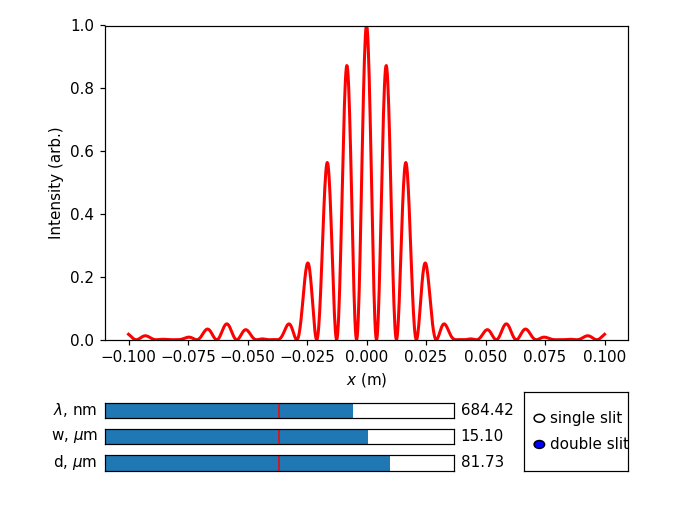

In [3]:
%matplotlib notebook
fig = plt.figure()
fig.canvas.set_window_title('Double slit interference')
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.15, bottom=0.35, top=.95)
plot = ax.plot(x, 0*x, '-r', lw=2)[0]   # initiate plot
plt.xlabel('$x$ (m)'), plt.ylabel('Intensity (arb.)')

sliders = []                        # draw sliders at bottom
xw, yw, offset, dx, dy = .15, .20, .05, .5, .03     # widgets pos.
for i in range(len(vars)):
    axes = fig.add_axes([xw, yw-i*offset, dx, dy])
    sliders.append(Slider(axes, vars[i], vals[i][0], vals[i][1], vals[i][2]))
    sliders[i].on_changed(updatefig)
    
items = ['single slit', 'double slit']  # add buttons    
baxes =fig.add_axes([.75, .1, .15, .15])
button = RadioButtons(baxes, items, 1)  # active = double slit (1)
button.on_clicked(updatefig)    

updatefig(0)
plt.show()